<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Práctica 06: Diseño de filtros digitales</center></font></h1>
<font  face="Times New Roman" size="3">
<p1><center> Ana Carolina Mejía</center></p1>
<p1><center>ana.mejiaa@udea.edu.co</center></p1>

In [5]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.signal import welch, firwin, filtfilt
from scipy import signal

# 4. Procedimiento

## 4.1 *Creación de la señal*

Proponga una secuencia sinusoidal *x_e(n)*, con 0 ≤ n ≤ 1000, F_0 = 0,01Hz y F_s = 25Hz. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico. El viaje de la señal hipotética *x_e(n)* a través de los diversos tejidos genera una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma:

*y_e(n)* = αx_e(n-D)+w(n).

Donde α representa la amplitud, D es un retraso debido a la conducción a través de los diversos tejidos y w(n)  representa el ruido generado por la electrónica de los sistemas de adquisición.

Genere las secuencias ficticias *x_e(n)* y *y_e (n)*, implemente *w(n)*  como una secuencia de ruido Gaussiano con media cero y varianza σ^2 = 0,01, establezca α = 0,8 y un retraso D = 15 muestras. Grafique ambas señales. 


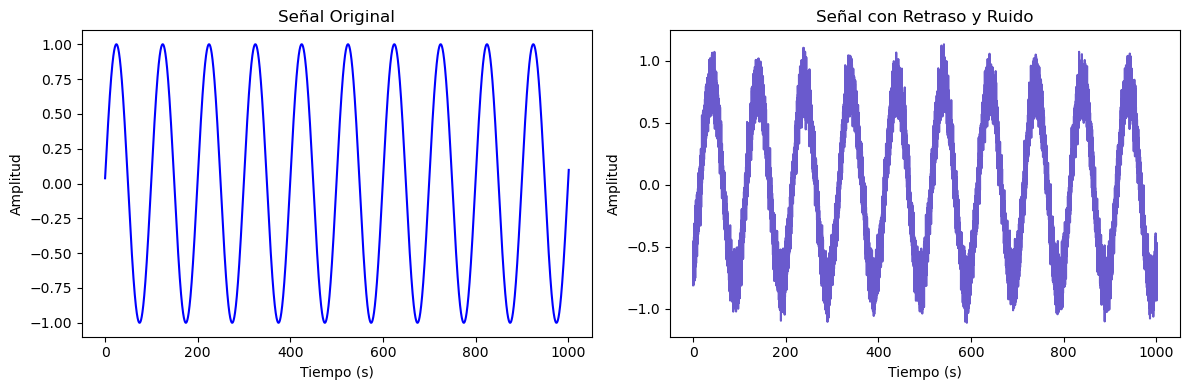

In [9]:
# Creando la señal Xe(n)
Fo = 0.01 # Frecuencia fundamental de la señal Xe(n)
Fs = 25 # Frecuencia de muestreo
n = np.arange(0,1001, 1/Fs) # Vector de la variabe independiente. En el enunciado se menciona que n se encuentra dentro de estos rangos.
Xe = np.sin(2*(np.pi)*Fo*(n+15/Fs)) # Señal biológica original.

# Creando la señal Ye(n) (retraso y atenuación de Xe)
alpha = 0.8 # Atenuación dado por el viaje de la señal Xe a través de diversos tejidos
D = 15 # Retardo induciodo por el viaje de la señal Xe a través de diversos tejidos

# Para el ruido Gaussiano
media = 0;
varianza = 0.01
std = np.sqrt(varianza)
w = np.random.normal(loc=media, scale=std, size=len(n)) #Secuencia de ruido gaussiano.

# Obteniendo la señal final de la forma: y_e (n)=α*Xe(n-D)+w(n)

Xe_Retardo = np.sin(2*(np.pi)*Fo*(n-D)) # Señal Xe retrasada en D muestras
Ye = alpha*Xe_Retardo + w

# Graficando las señales Xe(n, Ye(n) y el W
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(n, Xe, color="blue")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Señal Original")

plt.subplot(1, 2, 2)
plt.plot(n, Ye, color="slateblue")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Señal con Retraso y Ruido")

plt.tight_layout()  # Ajusta el espaciado entre los subplots
plt.show()

## 4.2 *Diseño de un filtro*

### **Diseño filtro FIR (pasa bajas, pasa altas y pasa-bandas)**

Para el diseño del filtro FIR se implementan las funciones *firwin* y para realizar su aplicación se emplea la función *filtfilt* de la librería signal de Scipy

**1. Diseño de un filtro FIR pasa bajas para la señal Ye(n), con una frecuencia de corte de 1.25 muestras/s y orden = 30.**

In [13]:
order_FIR = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn_l = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
lowpass = signal.firwin(order_FIR+1,wn_l, pass_zero = 'lowpass',window='hamming') #filtro
FIR_lowpass = signal.filtfilt(b=lowpass,a=1,x=Ye) # aplicación del filtro

**2. Diseño de un filtro FIR pasa altas para la señal Ye(n), con una frecuencia de corte de 7.5 muestras/s y orden = 30.**

In [16]:
wn_h = 7.5/nyquist #frecuencia de corte normalizada respecto nyquist
highpass = signal.firwin(order_FIR+1,wn_h, pass_zero = 'highpass',window='hamming') #filtro
FIR_highpass = signal.filtfilt(b=highpass,a=1,x=Ye) # aplicación del filtro

**3. Diseño de un filtro FIR pasa bandas para la señal Ye(n), con una f1 = 1.25 Hz y f2 = 7.5 Hz y orden = 30.**

In [19]:
bandpass = signal.firwin(order_FIR+1,[wn_l,wn_h], pass_zero = 'bandpass',window='hamming') #filtro
FIR_bandpass = signal.filtfilt(b=bandpass,a=1,x=Ye) # aplicación del filtro

**Resultado**

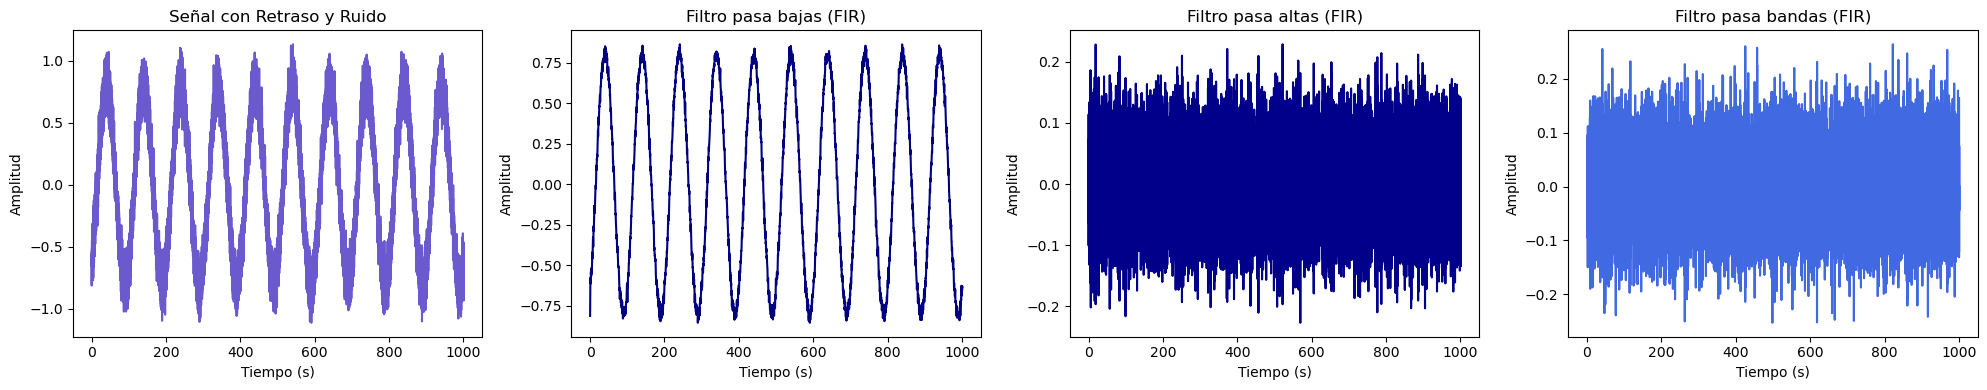

In [22]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.plot(n, Ye, color='slateblue')
plt.title('Señal con Retraso y Ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(1, 4, 2)
plt.plot(n,FIR_lowpass, color="navy")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bajas (FIR)")

plt.subplot(1, 4, 3)
plt.plot(n,FIR_highpass, color="darkblue")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa altas (FIR)")

plt.subplot(1, 4, 4)
plt.plot(n,FIR_bandpass, color="royalblue")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bandas (FIR)")

plt.tight_layout()
plt.show()

**¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.**

Al implementar un filtro pasa altas o pasa bandas, se debe modificar el argumento pass_zero por 'highpass' o 'bandpass' según los requerimientos. Adicionalmente, para el diseño del filtro pasa bandas el argumento 'cutoff' recibe una matriz con las 2 frecuencias de corte determinadas (band edges)

### **Diseño filtro IIR (pasa bajas, pasa altas y pasa-bandas)**
Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores

Ya que los filtros IIR funcionan con un orden mucho menor que los filtros FIR, se modificó el orden estableciéndolo igual a 16. 

In [28]:
order_IIR = 16 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn_l = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist

**1. Diseño de un filtro IIR pasa bajas para la señal Ye(n), con una frecuencia de corte de 1.25 muestras/s y orden = 30.**

In [31]:
b_low, a_low = signal.iirfilter(order_IIR, wn_l, btype='low', analog=False, ftype='butter')
IIR_lowpass = signal.filtfilt(b_low, a_low, Ye)

**2. Diseño de un filtro IIR pasa altas para la señal Ye(n), con una frecuencia de corte de 7.5 muestras/s y orden = 30.**

In [34]:
b_high, a_high= signal.iirfilter(order_IIR, wn_h, btype='high', analog=False, ftype='butter')
IIR_highpass = signal.filtfilt(b_high, a_high, Ye)

**3. Diseño de un filtro IIR pasa bandas para la señal Ye(n), con una f1 = 1.25 Hz y f2 = 7.5 Hz y orden = 30.**

In [37]:
b_band, a_band= signal.iirfilter(order_IIR, [wn_l,wn_h], btype='band', analog=False, ftype='butter')
IIR_passband = signal.filtfilt(b_band, a_band, Ye)

**Resultados**

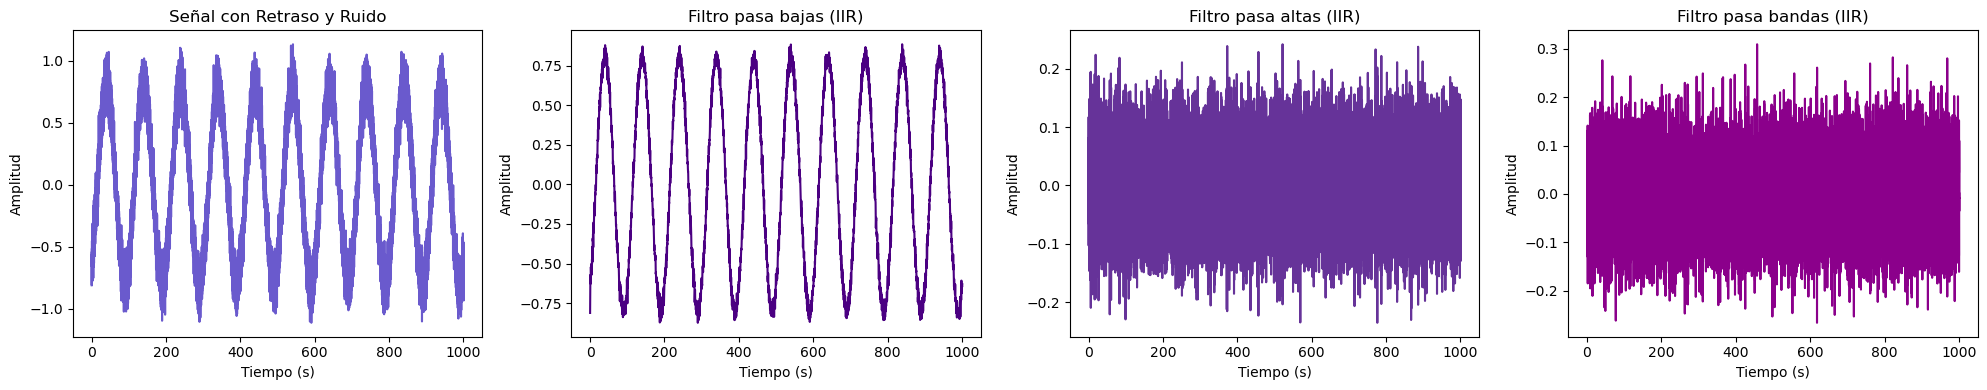

In [40]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.plot(n, Ye, color='slateblue')
plt.title('Señal con Retraso y Ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(1, 4, 2)
plt.plot(n,IIR_lowpass, color="indigo")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bajas (IIR)")

plt.subplot(1, 4, 3)
plt.plot(n,IIR_highpass, color="rebeccapurple")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa altas (IIR)")

plt.subplot(1, 4, 4)
plt.plot(n,IIR_passband, color="darkmagenta")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bandas (IIR)")

plt.tight_layout()
plt.show()

**Comparación de cambios**

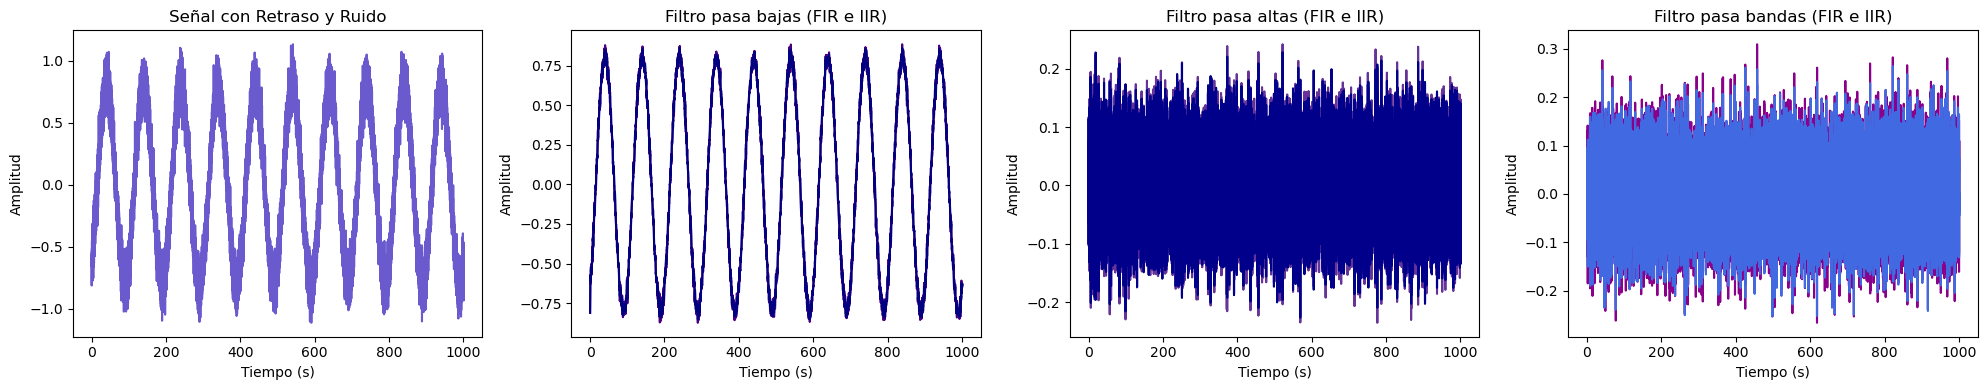

In [43]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.plot(n, Ye, color='slateblue')
plt.title('Señal con Retraso y Ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(1, 4, 2)
plt.plot(n,IIR_lowpass, color="indigo")
plt.plot(n,FIR_lowpass, color="navy")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bajas (FIR e IIR)")

plt.subplot(1, 4, 3)
plt.plot(n,IIR_highpass, color="rebeccapurple")
plt.plot(n,FIR_highpass, color="darkblue")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa altas (FIR e IIR)")

plt.subplot(1, 4, 4)
plt.plot(n,IIR_passband, color="darkmagenta")
plt.plot(n,FIR_bandpass, color="royalblue")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Filtro pasa bandas (FIR e IIR)")

plt.tight_layout()
plt.show()

Como se puede observar, en el dominio del tiempo las diferencias entre los filtros FIR e IIR no son perceptibles. Por esta razón, se hará la comparación de cambios en el dominio de la frecuencia utilizando el Diagrama de Bode. 

**Función para obtener el diagrama de bode de los filtros**

Esta función tiene como argumentos el numerador y el denominador de la función de transferencia, y a la salida se obtiene el diagrama de bode del filtro.

In [47]:
def mfreqz(b,a,order,nyq_rate = 1):

    """
    Plot the impulse response of the filter in the frequency domain

    Parameters:

        b: numerator values of the transfer function (coefficients of the filter)
        a: denominator values of the transfer function (coefficients of the filter)

        order: order of the filter

        nyq_rate = nyquist frequency
    """

    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure(figsize=(20,4));
    plt.subplot(131);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    [xmin, xmax, ymin, ymax] = plt.axis();
    plt.grid(True);

    plt.subplot(132);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.grid(True)
    plt.grid(True)


    plt.subplot(133);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Pasa bajas IIR y FIR**

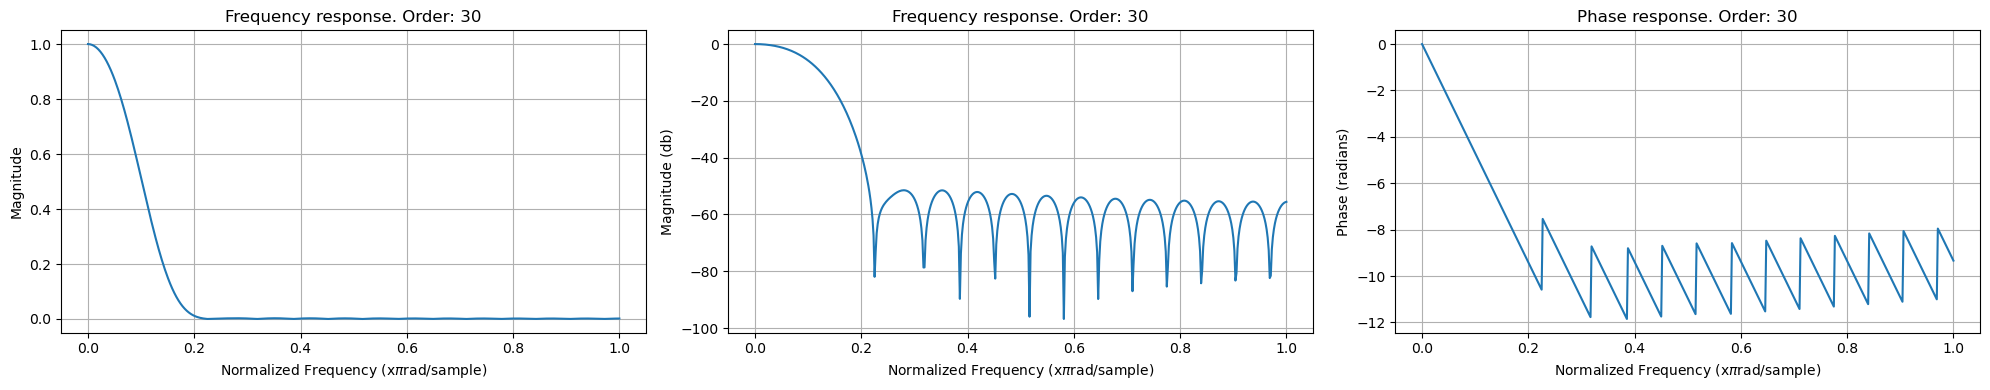

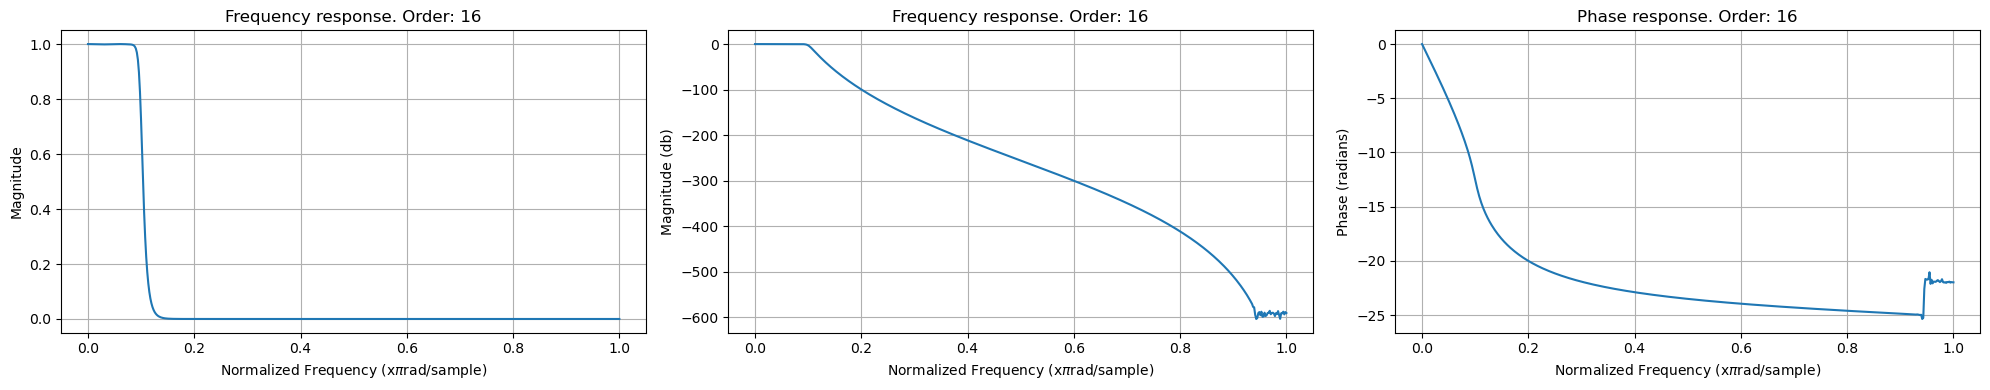

In [50]:
mfreqz(lowpass, 1, 30) #FIR
mfreqz(b_low, a_low, 16) #IIR

**Pasa altas IIR y FIR**

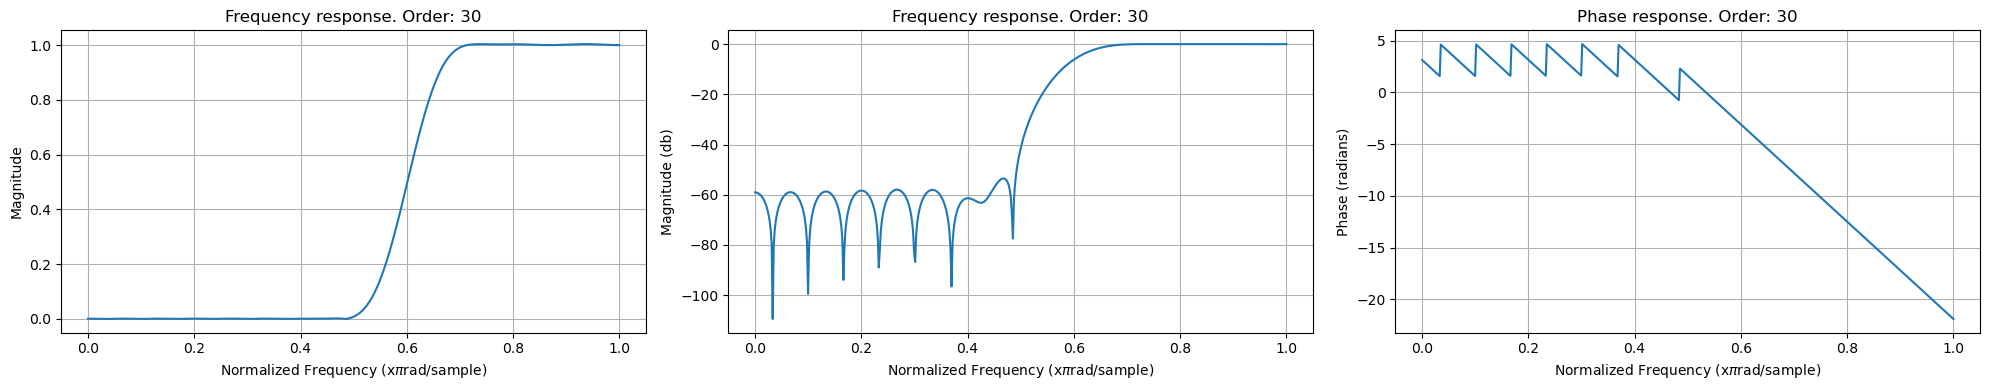

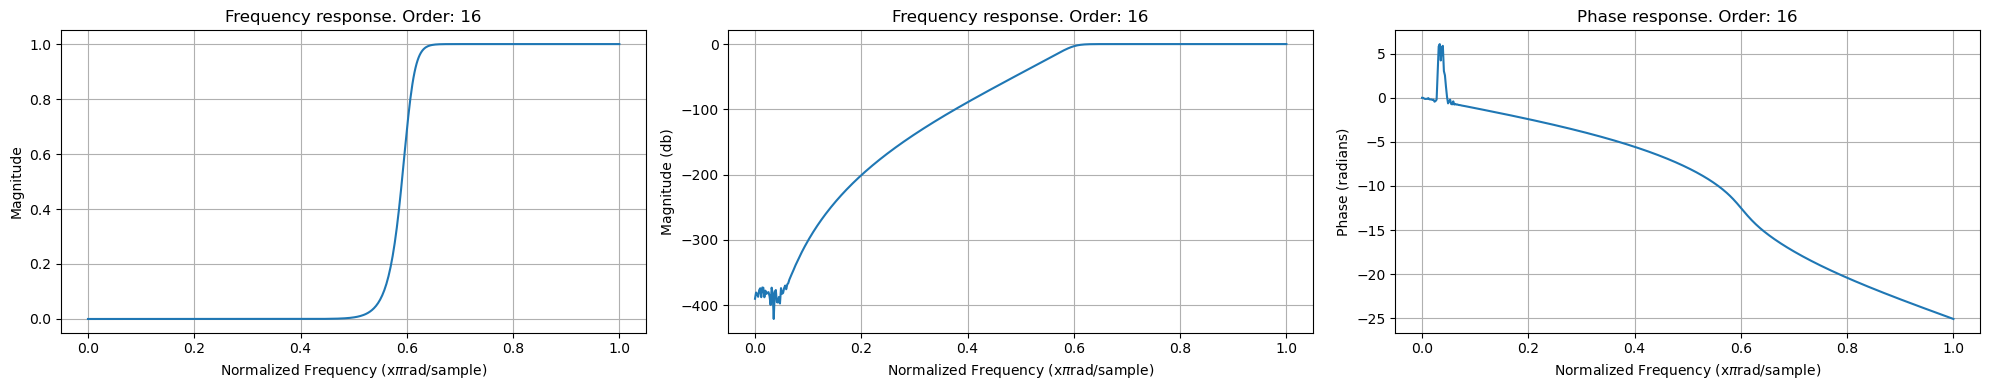

In [53]:
mfreqz(highpass, 1, 30) #FIR
mfreqz(b_high, a_high, 16) #IIR

**Pasa bandas IIR y FIR**

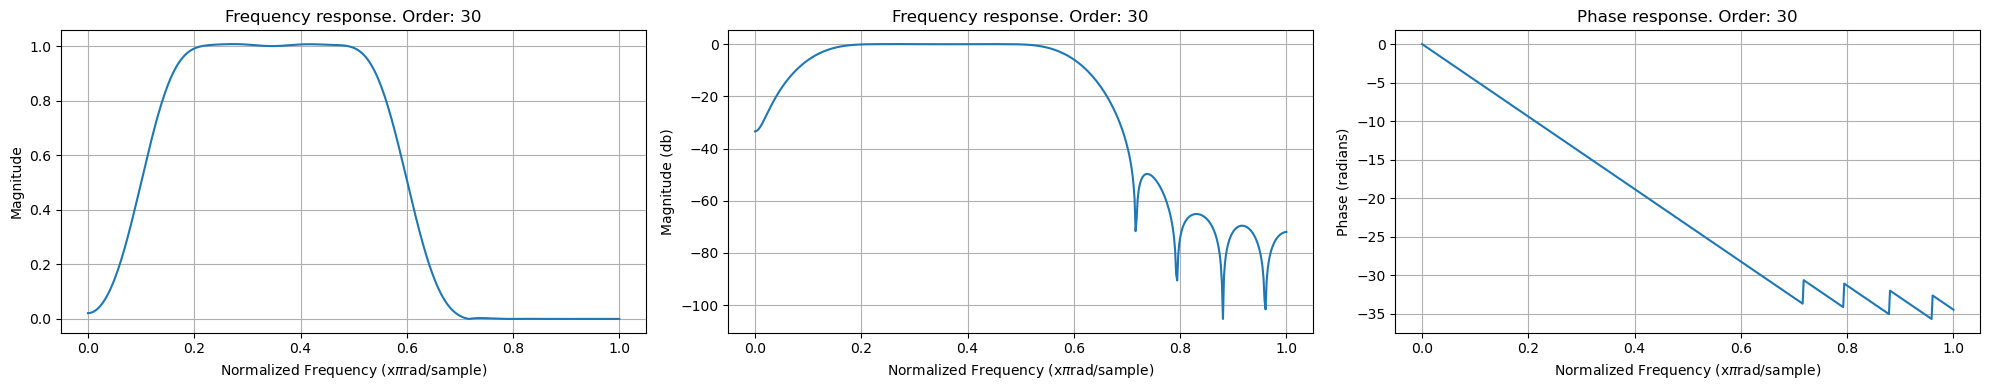

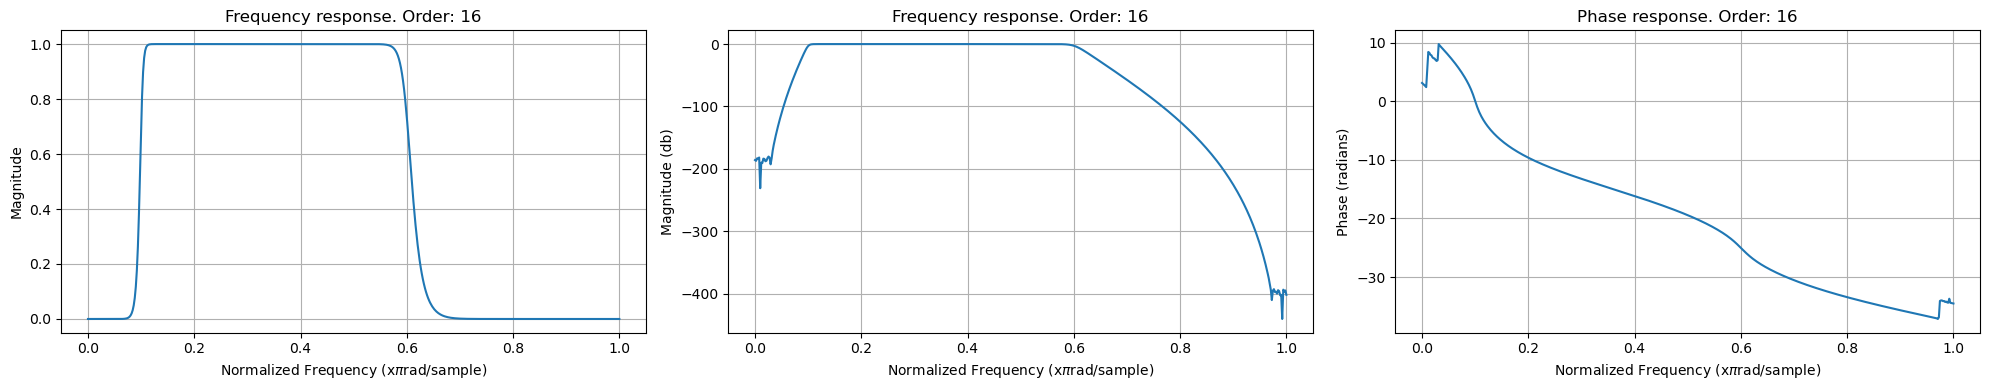

In [56]:
mfreqz(bandpass, 1, 30) #FIR
mfreqz(b_band, a_band, 16) #IIR

Fundamentado en los diagramas de Bode graficados, se puede evidenciar en los filtros FIR una pendiente de atenuación más suave en las bandas de transición en comparación con los filtros IIR, los cuales tienen una caída más rápida, lo que resulta en una mejor separación de frecuencias. Asimismo, los filtros FIR tienen una mayor estabilidad al tener una respuesta con tendencia lineal en las bandas de paso (fase lineal con la frecuencia), es decir, todas las frecuencias se desplazarán en el tiempo en la misma cantidad. Esta alta estabilidad es gracias a que, al no tener retroalimentación, no es posible que se vuelvan inestables para ningún tipo de señal de entrada, lo que es ideal en aplicaciones donde se requiere mantener la forma original de la señal, minimizando las distorsiones de fase, por ejemplo, en el caso de señales biológicas. En los filtros FIIR, su menor inestabilidad numérica se debe a las rutas retroalimentación, dicha inestabilidad se visualiza como curvas en la fase, que indican que, en general, la fase no es lineal con la frecuencia. Adicionalmente se presentan picos de resonancia y esto genera inestabilidad en la fase y la magnitud en la banda de paso. También es posible observar que los filtros FIIR tienen un mayor rizado en la banda de rechazo en comparación con los IIR. [5] [6]

## 4.3 *Filtrado*

Las funciones lfilter y filtfilt filtran una secuencia de información x(n) usando un filtro IIR o FIR. 

- Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas FIR implementado anteriormente y la señal y_e (n)  ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado? Analice.

- Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas IIR implementado anteriormente y la señal y_e (n) ¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice. 


#### **Prueba de los comando para el filtro pasa bajas FIR**

In [62]:
# Filtrado con el filtro pasa bajas FIR utilizando lfilter
FIR_lfilter = signal.lfilter(lowpass, 1, Ye)

# Filtrado con el filtro pasa bajas FIR utilizando filtfilt
FIR_filtfilt = signal.filtfilt(lowpass, 1, Ye)

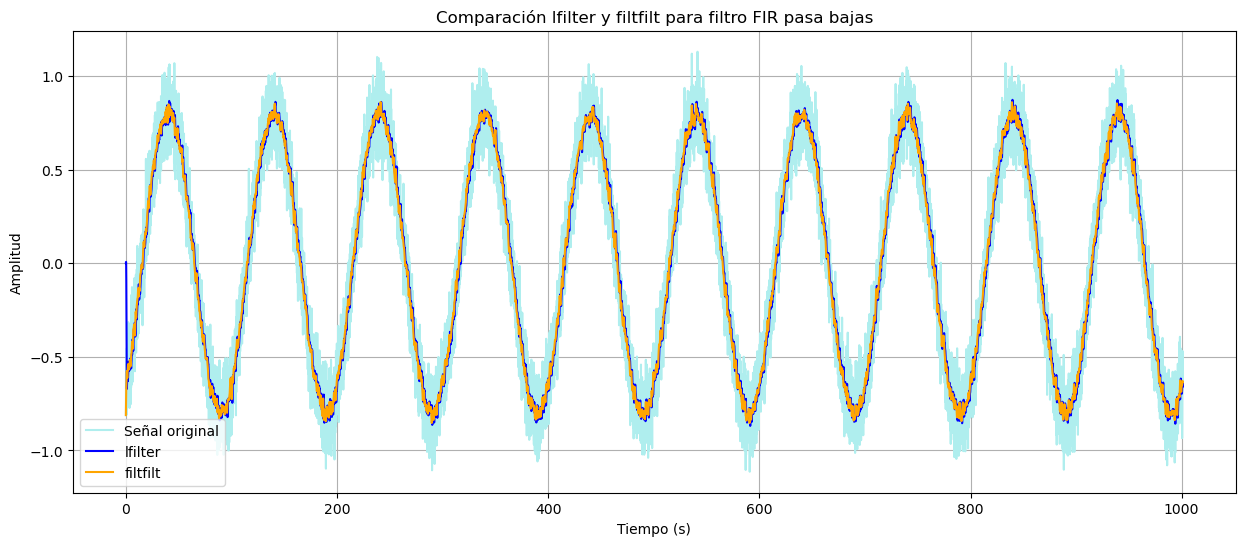

In [64]:
plt.figure(figsize=(15, 6))
plt.plot(n, Ye, label='Señal original', color="paleturquoise")  # Señal original
plt.plot(n, FIR_lfilter, label='lfilter', color="blue")  # Señal filtrada con lfilter
plt.plot(n, FIR_filtfilt, label='filtfilt', color="orange")  # Señal filtrada con filtfilt
plt.title('Comparación lfilter y filtfilt para filtro FIR pasa bajas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

In [66]:
from PIL import Image

In [68]:
filtro_digital = Image.open('definicion_filtro.jpeg')
filtro_FIR = Image.open('filtro FIR.jpeg')
Hz_filtroFIR = Image.open('Hz_filtroFIR.jpeg')
Hz_filtroIIR = Image.open('filtro IIR.jpeg')

**¿Por qué se utiliza sólo el  numerador en el filtro FIR?**

Si se parte de la ecuación de diferencias: 

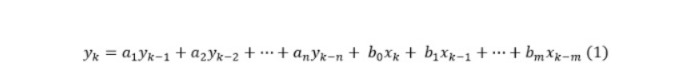

In [71]:
filtro_digital

Un filtro FIR o filtro no recursivo de orden m está dado por:

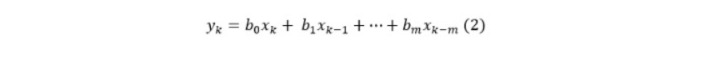

In [74]:
filtro_FIR

El diseño de los filtros FIR está basado en una estructura de convolución sin retroalimentación. La salida de los filtros FIR depende únicamente de los valores de entrada actuales y pasados, es decir, no utilizan valores de salida anteriores para calcular su salida actual. Esto lo podemos observar en la ecuación (2), donde yx[k] corresponden a los valores de entrada, y no se tienen valores de salida y[n], debido a que en este caso todos los coeficientes *a0* son igual a 0. Estos valores son ponderados por los coeficientes *b0* del filtro, los cuales corresponden al numerador de la función de transferencia del filtro. Es por esta razón que el denominador (el cual representa la retroalimentación) es igual a 1 en los filtros FIR. [4][5]

**¿A qué hace referencia el numerador?**

El numerador hace referencia a los coeficientes aplicados a los valores de entrada de la señal, que representan los términos del numerador en la función de transferencia del filtro e indica cómo el filtro responde a un impulso unitario en la entrada.

**¿Evidencia cambios en el uso  de las funciones de filtrado FIR?**

Teóricamente, en el filtrado resultante se podrían evidenciar diferencias según el uso de lfilter o filtfilt. La función lfilter puede introducir desfase en la señal de entrada puesto que procesa la señal haciendo un barrido en una única dirección. Esto ocurre por la acumulación de desfases ya que en algunos puntos la salida dependerá únicamente de las muestras de entradas anteriores [1]. Por otro lado, al implementar la función filtfilt, el procesamiento de la señal se da como un barrido en ambas direcciones (inicialmente de inicio a fin y posteriormente de fin a inicio), minimizando el desfase introducido por el filtro [2]. Para el filtrado realizado, sólo se evidencian cambios en el filtrado en el pico inicial que se da en lfilter.

**¿Es adecuado el orden del filtro usado?**

Podría decirse que el orden de filtro empleado es adecuado, de acuerdo a lo observado en el diagrama de Bode, donde se ve cómo se logra atenuar las frecuencias superiores a la frecuencia de corte. Asimismo, al verla señal filtrada en el dominio del tiempo se evidencia la disminución del ruido de alta frecuencia.

#### **Prueba de los comando para el filtro pasa bajas IIR**

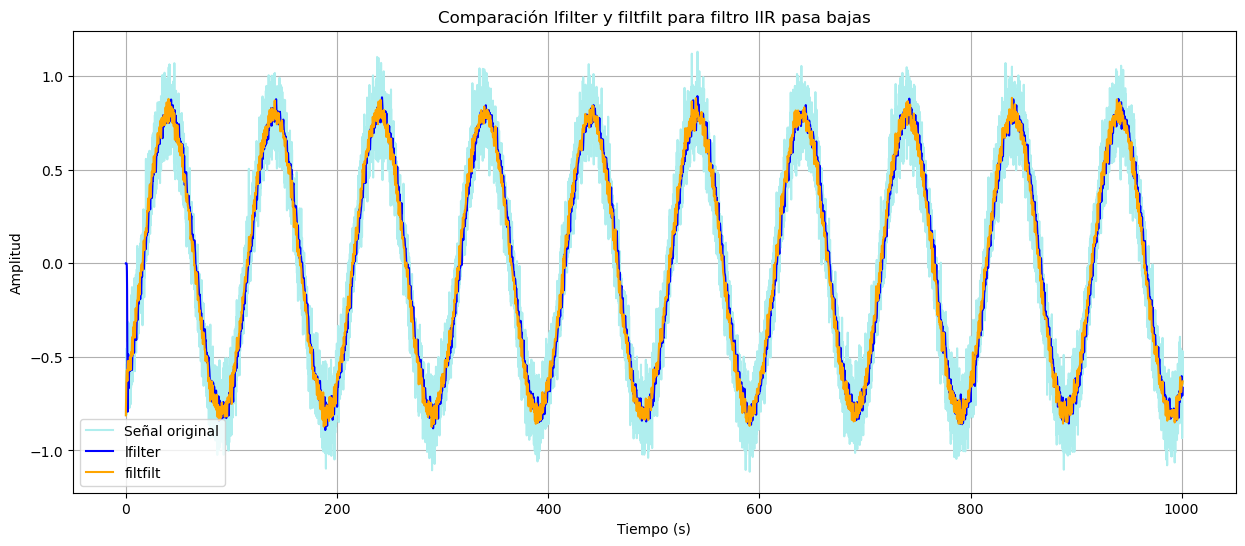

In [78]:
# Filtrado con el filtro pasa bajas IIR utilizando lfilter
IIR_lfilter = signal.lfilter(b_low, a_low, Ye)
# Filtrado con el filtro pasa bajas IIR utilizando filtfilt
IIR_filtfilt = signal.filtfilt(b_low, a_low, Ye)

plt.figure(figsize=(15, 6))
plt.plot(n, Ye, label='Señal original', color="paleturquoise")  # Señal original
plt.plot(n, IIR_lfilter, label='lfilter', color="blue")  # Señal filtrada con lfilter
plt.plot(n, IIR_filtfilt, label='filtfilt', color="orange")  # Señal filtrada con filtfilt
plt.title('Comparación lfilter y filtfilt para filtro IIR pasa bajas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

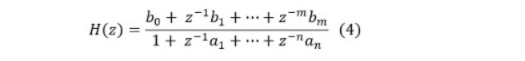

In [79]:
Hz_filtroIIR

**¿Por qué se utiliza el numerador y denominador en el filtro IIR?**

En los filtros IIR, se tiene una respuesta al impulso infinito, esto es posible al implementar una estructura donde además de utilizar el numerador, se utiliza el denominador, que contiene los coeficientes *a(n)*, pues en este caso toman valores diferentes a 0, y esto se hace para emplear la retroalimentación, lo que implica que la salida del filtro depende también de salidas pasadas. La capacidad de respuesta al impulso infinita, le confiere al filtro la capacidad de modelar frecuencias con menor cantidad de coeficientes en comparación con un filtro FIR [3].

Teóricamente, un mayor orden genera una mejor aproximación a la frecuencia de corte deseada y mayor atenuación, pero esto también puede aumentar el desfase y generar inestabilidad en la banda de paso y la banda de rechazo, por lo que vamos a modificar el orden del filtro, para visualizar su comportamiento.

**¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice.**

Se considera que la atenuación y el comportamiento del filtro IIR pasa bajas es adecuado. No obstante, con propósitos de probar sus comportamientos ante un orden de filtro menor, se harán modificicaciones, reduciéndolo tanto para el filtro IIR como para el filtro FIR, teniendo un orden de 8 y de 15, respectivamente.

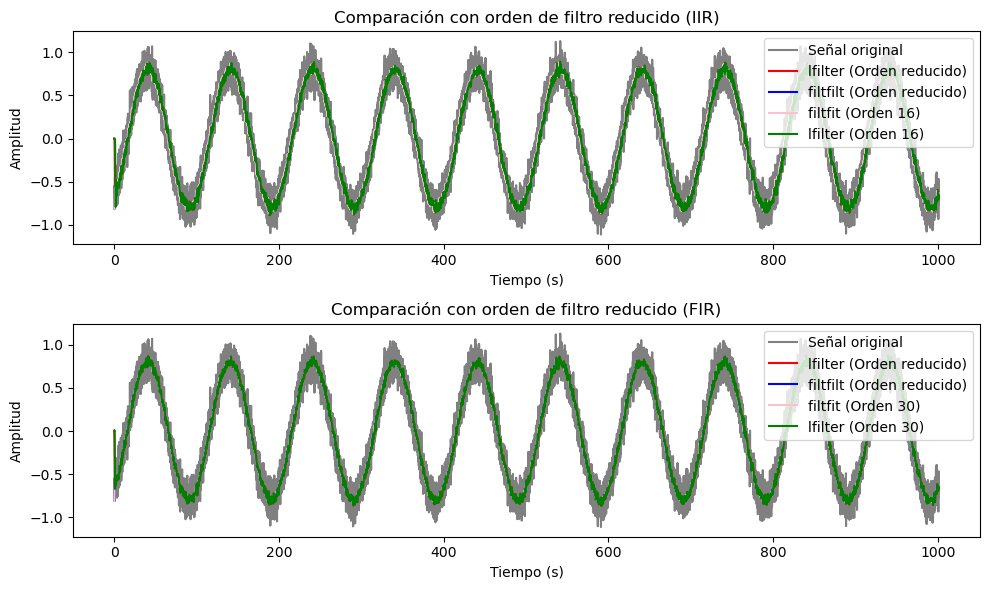

In [90]:
b_low_new, a_low_new = signal.butter(order_IIR/2, wn_l, 'lowpass')

IIR_lfilter_new = signal.lfilter(b_low_new, a_low_new, Ye)
IIR_filtfilt_new = signal.filtfilt(b_low_new, a_low_new, Ye)

b_low_new_2, a_low_new_2 = signal.butter(order_FIR/2, wn_l, 'lowpass')

FIR_lfilter_new = signal.lfilter(lowpass,1, Ye)
FIR_filtfilt_new = signal.filtfilt(lowpass,1, Ye)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(n, Ye, label='Señal original',  color="gray")  # Señal original
plt.plot(n, IIR_lfilter_new, label = 'lfilter (Orden reducido)',  color="red")
plt.plot(n, IIR_filtfilt_new, label = 'filtfilt (Orden reducido)',  color="blue")
plt.plot(n, IIR_filtfilt, label = 'filtfit (Orden 16)', color='pink')
plt.plot(n, IIR_lfilter, label = 'lfilter (Orden 16)', color='green')
plt.title('Comparación con orden de filtro reducido (IIR)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(n, Ye, label='Señal original',  color="gray")  # Señal original
plt.plot(n, FIR_lfilter_new, label='lfilter (Orden reducido)',  color="red")
plt.plot(n, FIR_filtfilt_new, label='filtfilt (Orden reducido)',  color="blue")
plt.plot(n, FIR_filtfilt, label = 'filtfit (Orden 30)', color='pink')
plt.plot(n, FIR_lfilter, label = 'lfilter (Orden 30)', color='green')
plt.title('Comparación con orden de filtro reducido (FIR)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()

En el dominio del tiempo no se observan con claridad las diferencias en los resultados de los filtros al disminuir su orden. Se procede a hacer un análisis con el diagrama de Bode, para un orden mayor y un orden menor, para ambos filtros (FIIR e IIR)

**Análisis variación en el orden del filtro para FIR**

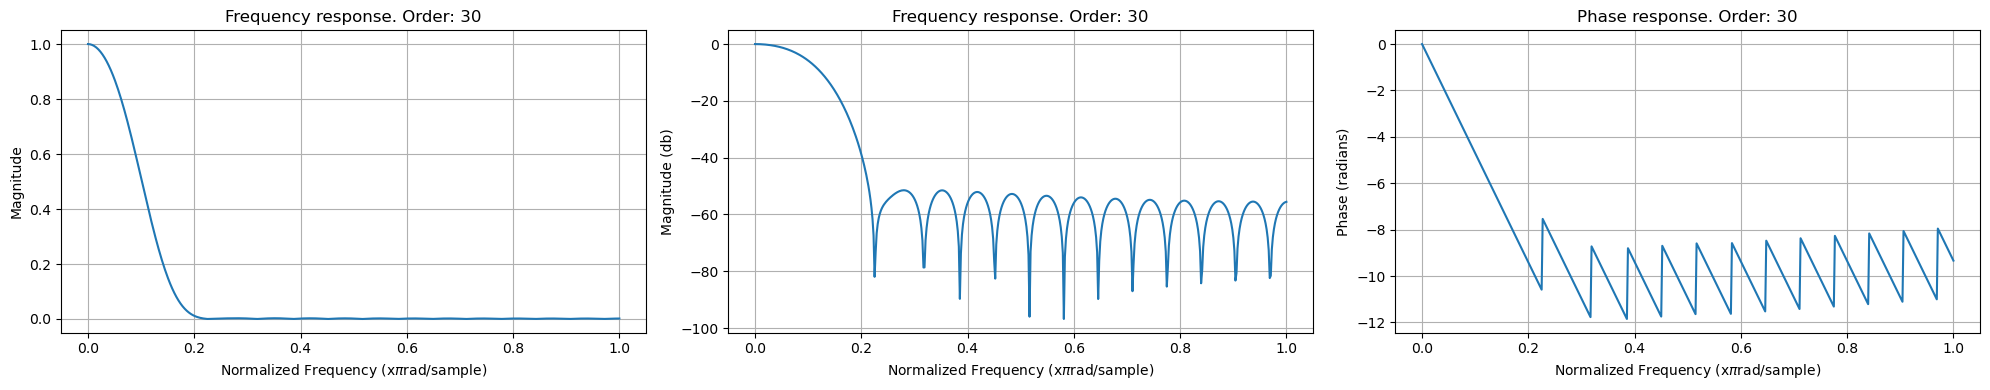

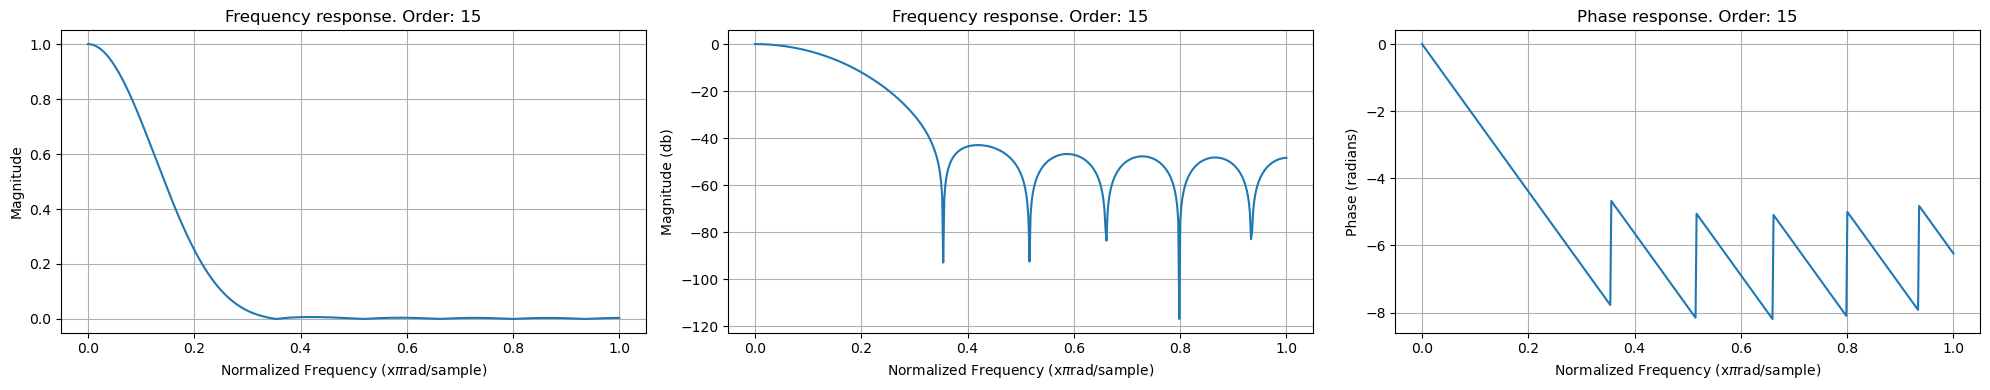

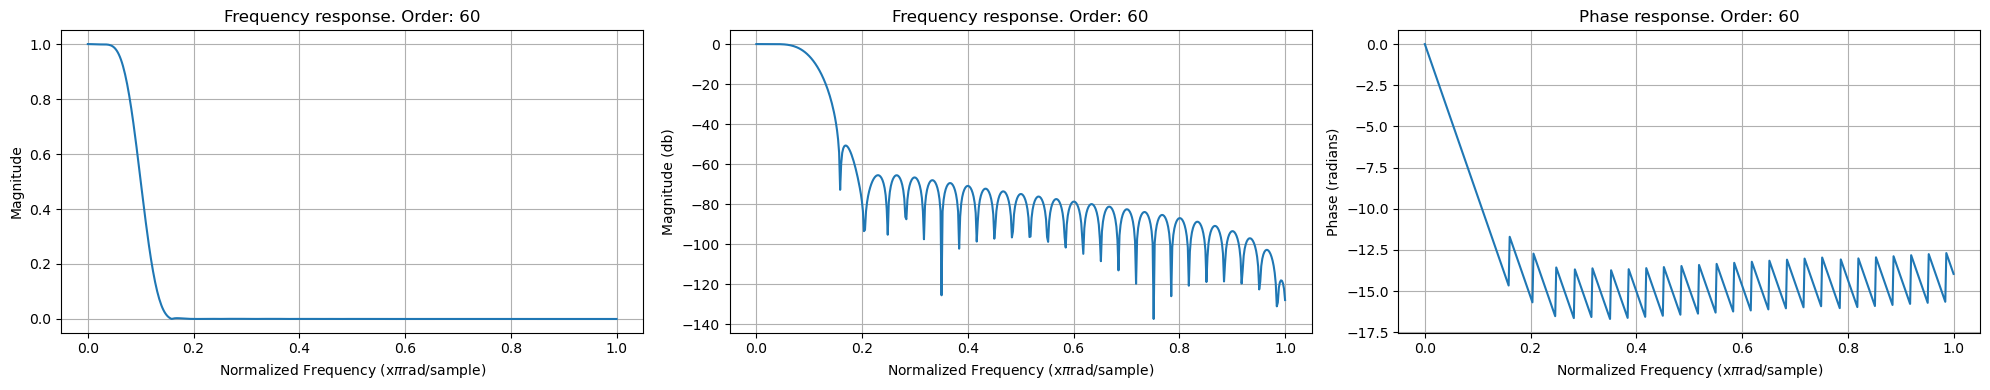

In [94]:
lowpass_2 = signal.firwin(15, wn_l, pass_zero = 'lowpass',window='hamming') #filtro
lowpass_3 = signal.firwin(60, wn_l, pass_zero = 'lowpass',window='hamming') #filtro

mfreqz(lowpass, 1, 30) #FIR orden 30
mfreqz(lowpass_2, 1, 15) #FIR orden 15
mfreqz(lowpass_3, 1, 60) #FIR orden 60

Teóricamente, un mayor orden genera una mejor aproximación a la frecuencia de corte deseada y mayor atenuación, pero esto también puede aumentar el desfase y generar inestabilidad en la banda de paso y la banda de rechazo, por lo que vamos a modificar el orden del filtro. Para el caso del FIR, podemos ver que al aumentar el orden del filtro se da una separación más clara entre la banda de paso y la banda de rechazo del filtro. Esta pendiente más pronunciada habla de una mayor eficiencia del filtro, por lo que se evidencia que en caso de los FIR, para obtener estos resultados, es necesario un mayor orden para que las señales en la banda de paso se vean menos afectadas y las que estén fuera de ella se atenúen mejor, ya que a un menor orden, mayor suavizada se verá la transición entre bandas.

**Análisis de variación en el orden del filtro para IIR**

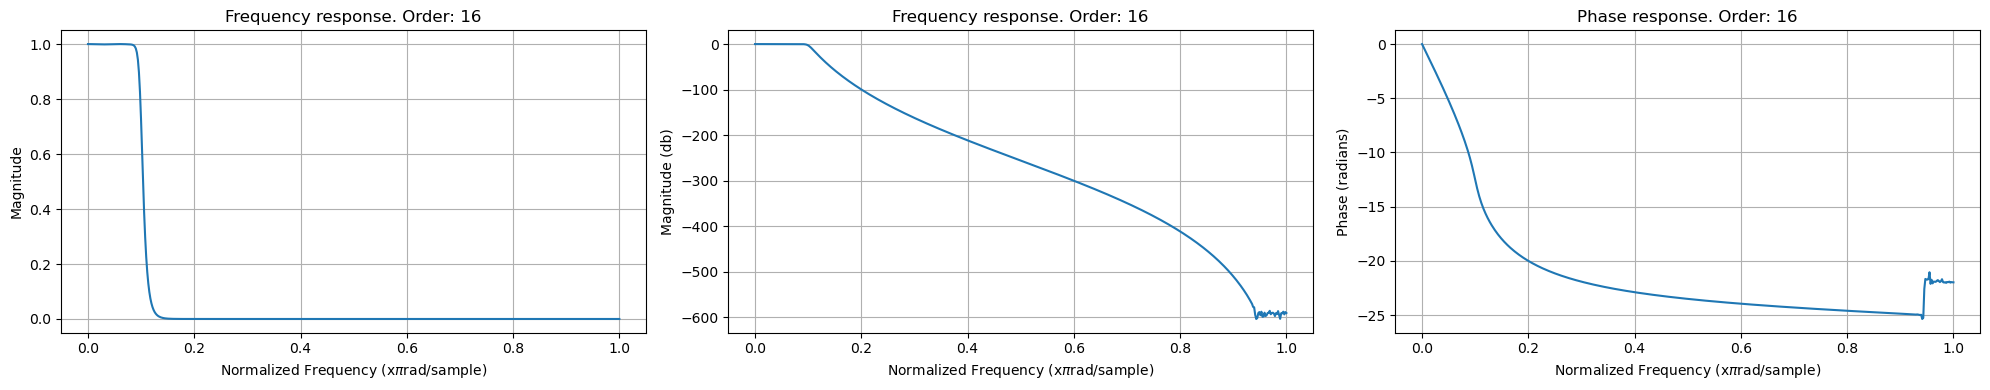

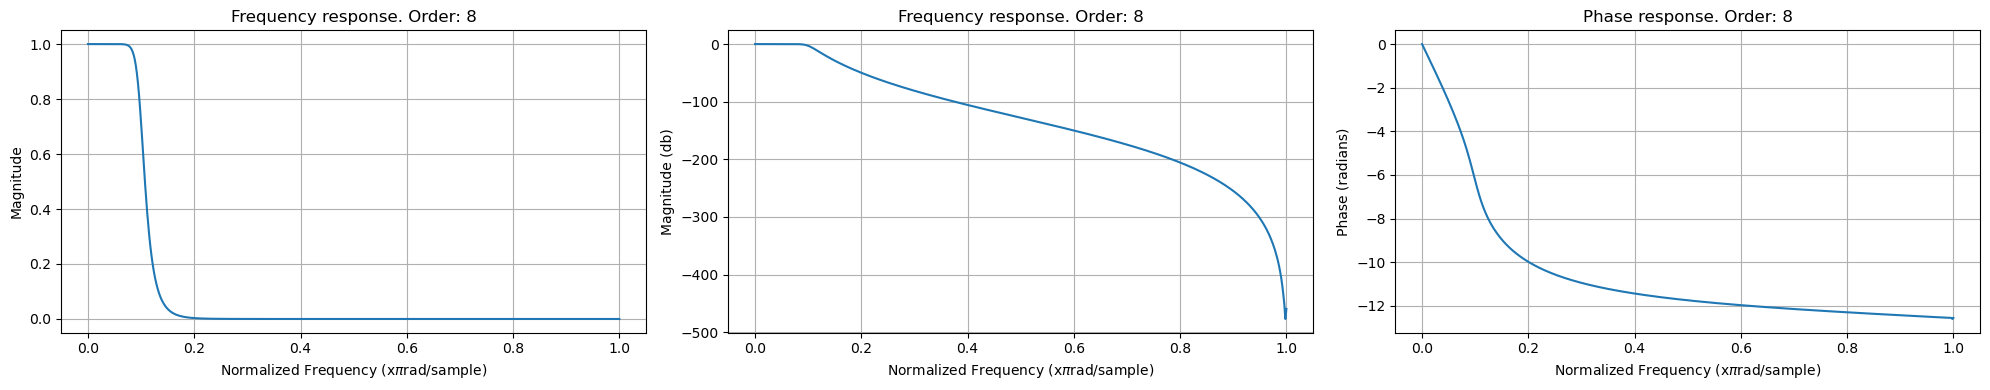

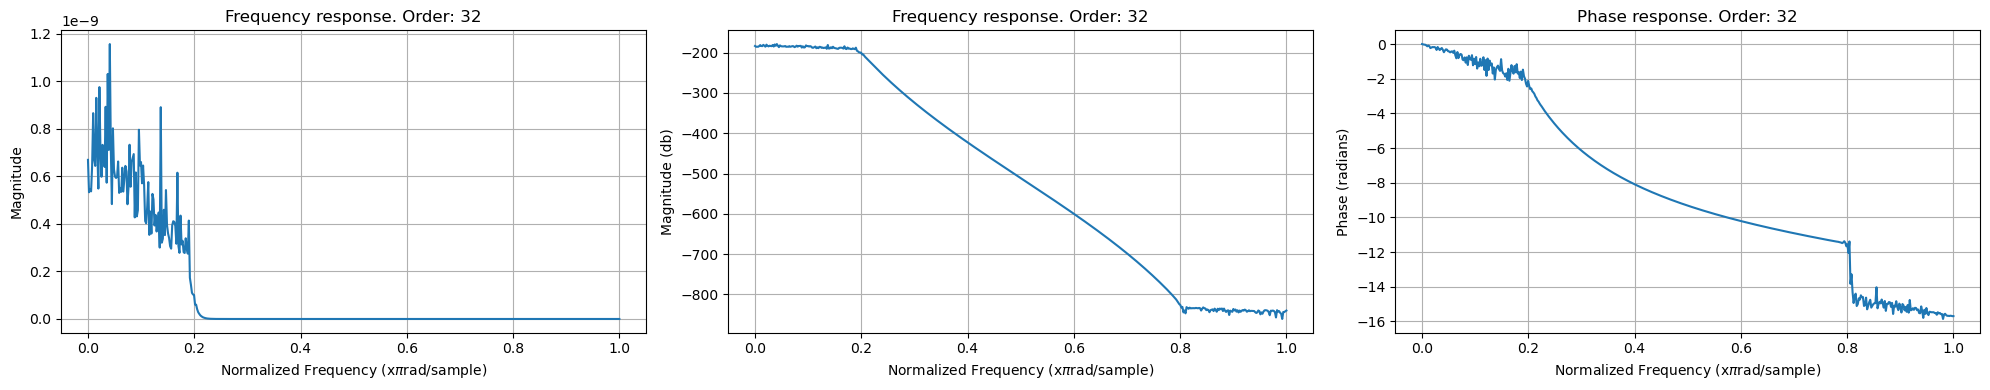

In [98]:
mfreqz(b_low, a_low, 16) #IIR

b_low_2, a_low_2 = signal.iirfilter(8, wn_l, btype='low', analog=False, ftype='butter')
b_low_3, a_low_3 = signal.iirfilter(32, wn_l, btype='low', analog=False, ftype='butter')
mfreqz(b_low_2, a_low_2, 8) #IIR
mfreqz(b_low_3, a_low_3, 32) #IIR

En el caso del IIR, podemos observar que al disminuir el orden a 8, el filtro tiene un comportamiento más adecuado, se eliminan los picos de resonancia que se observaban al utilizar un orden de filtro igual a 16, demostrando que el filtrado es más eficiente a un orden más bajo, y emplear un orden más elevado puede aumentar el desfase y generar mayor inestabilidad en la banda de baso.

## 4.4 *Aplicación*

Cargue la señal señal_filtros.txt adquirida a una frecuencia de muestreo de 500 Hz. Extraiga y trabaje con el canal 1 de la señal.

- Realice un análisis frecuencial con la función que permite calcular el periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice. 
- Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.
- Grafique un segmento de las señales antes y después de filtrar, analice los cambios.


#### **Carga de la señal y extracción de la señal del canal 1**

In [104]:
import os
directorio_actual = os.getcwd()

In [106]:
archivo = directorio_actual + "/senal_filtros.txt"

In [108]:
senal = np.loadtxt(archivo)
senal_C1 = senal[:,0] #Extracción de la señal del canal 1
fs= 500 #Frecuencia de muestreo 

In [110]:
print(f'La señal tiene un total de {len(senal_C1)} muestras')

La señal tiene un total de 60000 muestras


#### **1. Análisis frecuencial - Periodograma de Welch.**

In [113]:
nperseg = 1024 # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas del 50%
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f, power = welch(senal_C1, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

#### **1.1 Gráfico de Frecuencia vs Potencia**

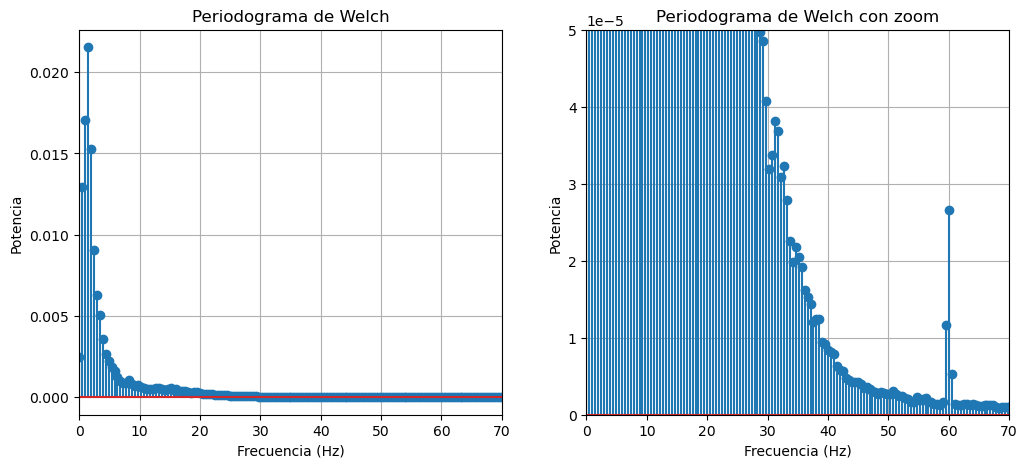

In [116]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.stem(f, power)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Periodograma de Welch')
plt.grid(True)
plt.xlim(0, 70)

plt.subplot(1,2,2)
plt.stem(f, power)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Periodograma de Welch con zoom')
plt.grid(True)
plt.xlim(0,70)
plt.ylim(0,0.00005)
plt.show()

Al observar el periodograma de Welch (gráfico a la izquierda) se puede evidenciar la presencia de ruido como un pico de baja a una frecuencia dentro del rango de 50/60Hz, que se visualiza como un salto en el gráfico. Se realiza zoom para observar con mayor detalle el pico y concluir la presencia del ruido eléctrico en la señal (gráfico de la derecha), que se encuentra dentro del rango de 57 a 60 Hz, aproximadamente.

#### **2. Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada)**

Se diseñará un filtro FIR pasa bajas con una frecuencia de corte en 57 Hz. Se seleccionó el filtro FIR al ser de nuestro interés no introducir distorsiones en la fase de la señal.

In [122]:
fc = 57  # Frecuencia de corte del filtro en Hz
orden = 110  # Orden del filtro FIR

# Normalizar la frecuencia de corte
wn = fc / (fs / 2)

# Diseñar el filtro FIR utilizando la ventana de Hamming
coeficientes_filtro = firwin(orden+1, wn, window='hamming')

# Filtrar la señal utilizando filtfilt para mantener la fase
señal_filtrada = filtfilt(coeficientes_filtro, 1, senal_C1)

Se estableció un orden de 110 ya que fue el orden en que se logró visualizar una máxima reducción del ruido.

#### **2.2 Análisis de cambios**

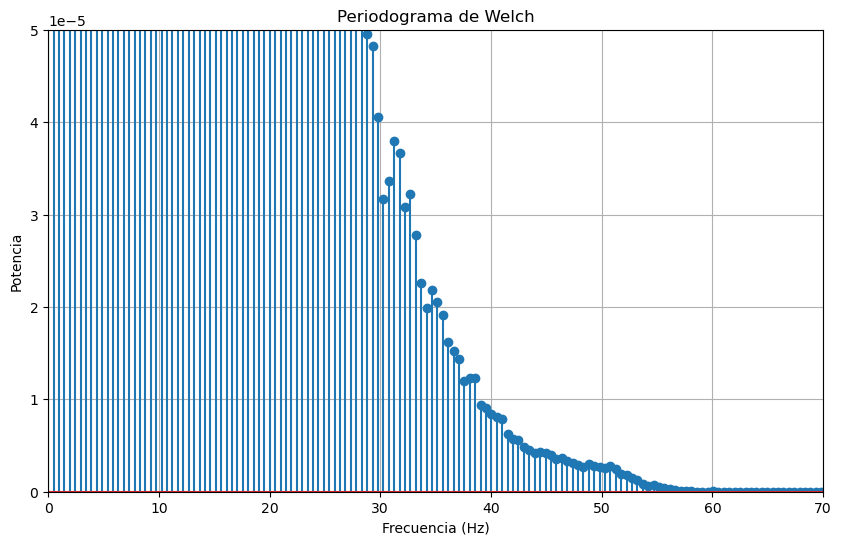

In [126]:
nperseg = 1024 # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas del 50%
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f, power = welch(señal_filtrada, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

# Se grafica frecuencia vs potencia
plt.figure(figsize=(10, 6))
plt.stem(f, power)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Periodograma de Welch')
plt.grid(True)
plt.xlim(0, 70)
plt.ylim(0,0.00005)
plt.show()

Al observar nuevamente el periodograma de Welch, se evidencia que con la aplicación del filtro pasa bajas fue posible eliminar el ruido de la red eléctrica. 

#### **3. Gráficos de segmentos de la señal antes y después del filtrado**

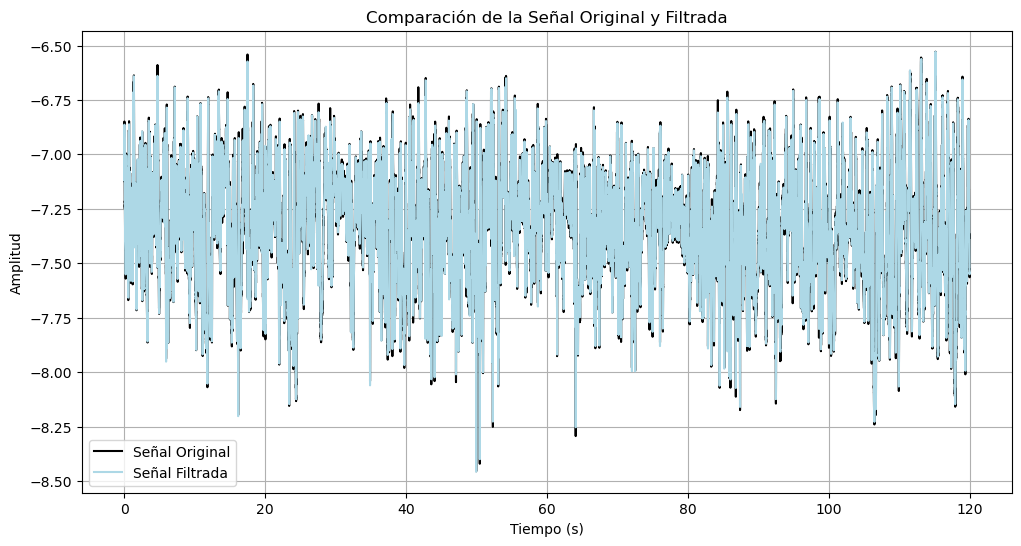

In [133]:
n = np.arange(0, len(senal_C1) / fs, 1 / fs) #Vector de tiempo

plt.figure(figsize=(12, 6))
plt.plot(n, senal_C1, label='Señal Original', color='black')
plt.plot(n, señal_filtrada, label='Señal Filtrada', color='lightblue')
plt.title('Comparación de la Señal Original y Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

#### **3.1 Análisis**

Se puede observar que al aplicar el filtro pasa bajas a la señal original, se evidencia una disminución en su amplitud. No obstante, esta disminución es mínima debido a la baja potencia que presentaba el ruido por interferencia eléctrica que fue filtrado, siendo este cambio mínimo. Además, al aplicar el filtro FIR, no se presenta desfase entre la señal de entrada y la señal filtrada. 

## *Conclusiones*

La implementación tanto de filtros FIR como IIR durante la práctica permitió evidenciar sus ventajas y desventajas al reflejar sus diferencias estructurales y funcionales en los filtrados resultantes, e igualmente fue posible concluir cómo su selección se determina por los requerimientos que se tengan, y el equilibrio que se desee entre la precisión el filtrado y la eficiencia computacional. Los filtros FIR en esencia tienen una menor complejidad al utilizar únicamente el numerador durante su implementación, pero para filtrados de mayor precisión necesitan de un incremento en la misma mediante un aumento en el orden del filtro para tener una pendiente de transición más abrupta, que mejore la eficiencia del filtrado al afectar en menor medida las frecuencias de la señal de interés que pertenecen a la banda de paso, por lo que puede demandar un mayor gasto computacional. Sin embargo, se resaltó su estabilidad y comportamiento lineal con la frecuencia, evitando distorsiones de la señal original. Por su parte, los filtros IIR tienen mayor eficiencia ante un orden de filtro menor, implicando una menor complejidad, pero generan distorsiones en frecuencia en la señal de interés posterior al filtrado, además de que presentan una menor estabilidad en comparación con los filtros FIR.

**Referencias bibliográficas**

[1]: «lfilter — SciPy v1.14.1 Manual». https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

[2]: «filtfilt — SciPy v1.14.1 Manual». https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html

[3]: «iirfilter — SciPy v1.14.1 Manual». https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirfilter.html

[4]: «firwin — SciPy v1.14.1 Manual». https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html

[5]: National Instruments, "Aplicación de filtros FIR e IIR", Documentación de Diadem , [En línea ] . Disponible en: [IIR Filters and FIR Filters](https://www.ni.com/docs/en-US/bundle/diadem/page/genmaths/genmaths/calc_filterfir_iir.htm#:~:text=If%20the%20impulse%20response%20of,(Infinite%20Impulse%20Response)%20filter.)

[6]: A. Solned , " Diferencia entre filtros IIR y FIR: una guía práctica de diseño", Advsolned, [En línea]. Disponible en: https://www.advsolned.com/difference-between-iir-and-fir-filters-a-practical-design-guide/.
